In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# 数据导入

In [2]:
data_file = "./card_transdata.csv"
data = pd.read_csv(data_file, sep=',', encoding='utf-8')

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
data.info()
#发现数据没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
from sklearn.model_selection import train_test_split
X = data.drop('fraud', axis=1)
y = data.fraud #将fraud列单独摘出
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((700000, 7), (300000, 7), (700000,), (300000,))

# 异常值检验

In [6]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
data.describe().to_csv('描述.csv',encoding = 'utf_8_sig')

In [7]:
#我们主要对前三列特征进行处理，因为其他列都是0,1分布
data_show = data.drop(["repeat_retailer","used_chip","used_pin_number","online_order","fraud"], axis=1)
data_show

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767
...,...,...,...
999995,2.207101,0.112651,1.626798
999996,19.872726,2.683904,2.778303
999997,2.914857,1.472687,0.218075
999998,4.258729,0.242023,0.475822


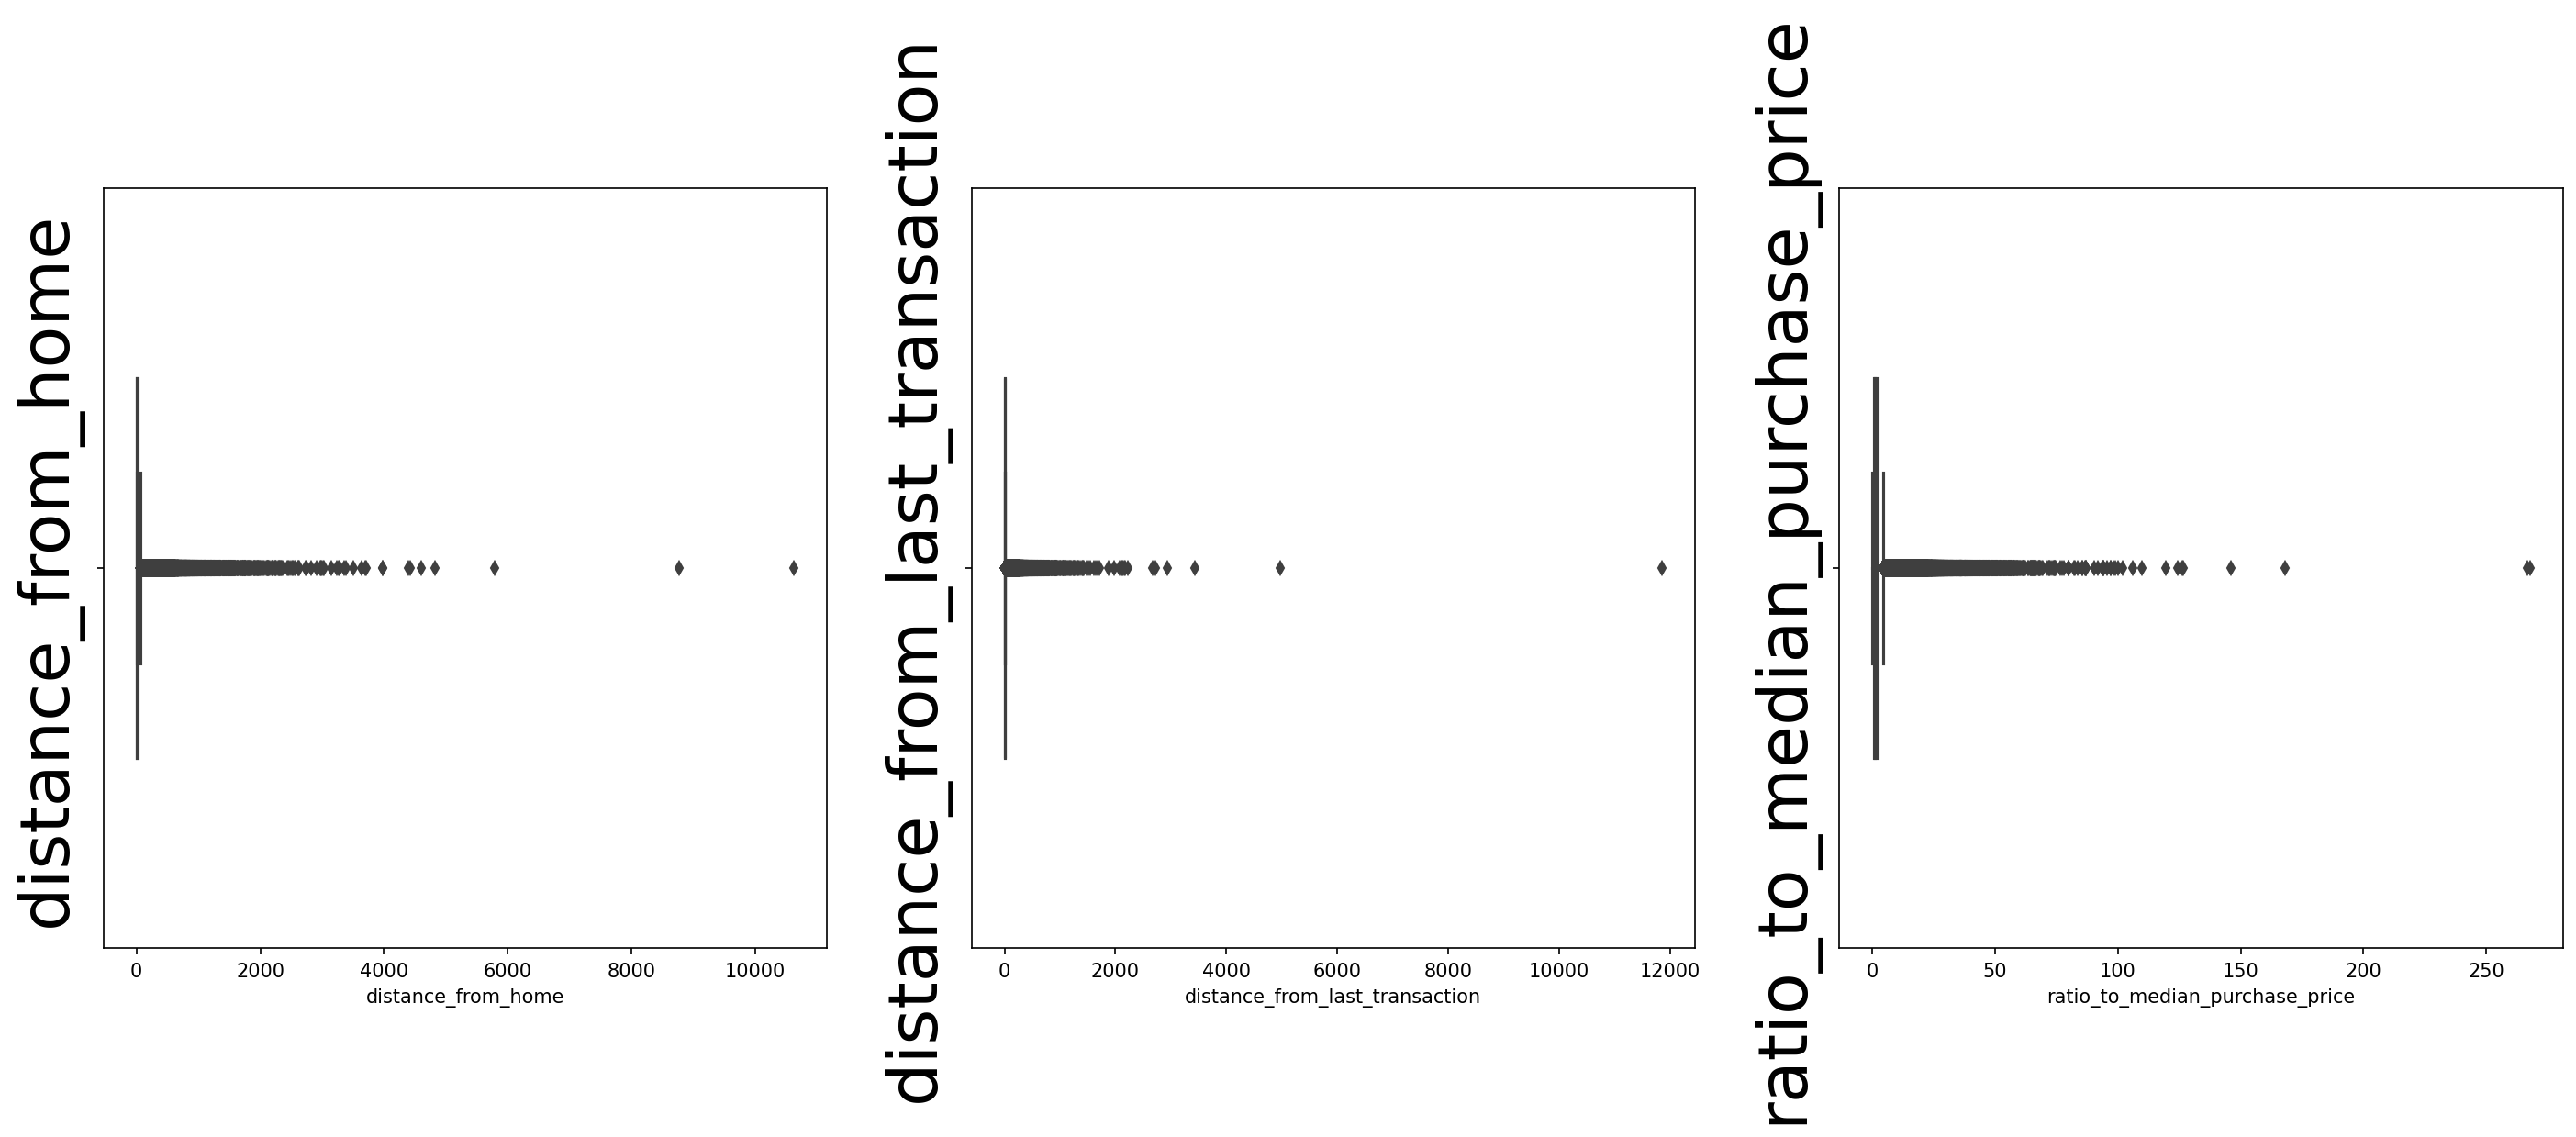

In [76]:
column = data_show.columns.tolist()[:4]  # 列表头
fig = plt.figure(figsize=(80, 60), dpi=150)  # 指定绘图对象宽度和高度
for i in range(3):
    plt.subplot(7, 10, i + 1)  #
    sns.boxplot(data_show[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=36)
plt.savefig("./箱型图.png")
plt.show()

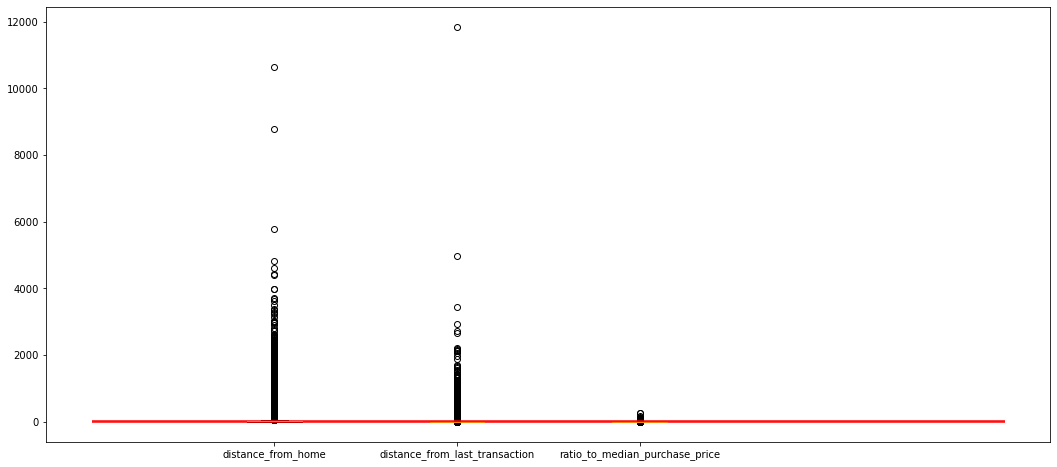

In [75]:
plt.figure(figsize=(18, 8))
plt.boxplot(x=data_show.values,labels=data_show.columns)
plt.hlines([-10, 10], 0, 5, colors='r')

plt.savefig("./三个特征的箱型图综合.png")
plt.show()
#通过箱型图，我们发现数据存在异常值

In [10]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 0.9587057142857143
mse= 0.041294285714285714
---------------------------------------
mean of residuals: 0.02829142857142857
std of residuals: 0.2012310578217395
---------------------------------------
28906 outliers:
[373136, 698277, 162314, 483244, 825020, 761666, 589347, 777146, 828469, 135012, 502154, 427753, 749959, 270917, 948622, 661386, 282926, 362062, 688110, 990311, 209224, 41362, 558591, 424058, 368041, 263853, 351559, 787413, 877796, 829645, 42185, 452147, 865674, 344559, 531531, 716692, 511666, 324677, 374942, 710987, 909785, 866884, 43061, 391044, 275537, 694327, 121237, 908580, 33949, 599146, 97197, 719296, 8030, 720038, 48087, 587130, 184307, 840733, 49069, 937463, 46314, 573775, 618902, 236302, 668465, 145220, 745952, 417217, 691135, 503061, 604985, 932450, 530583, 694339, 386570, 946743, 65464, 703641, 955673, 722171, 954683, 260690, 972444, 286103, 555818, 657223, 649982, 373496, 22311, 226608, 192911, 245648, 546771, 711647, 740971, 203797, 644173, 881505, 518236

((671094, 7), (671094,))

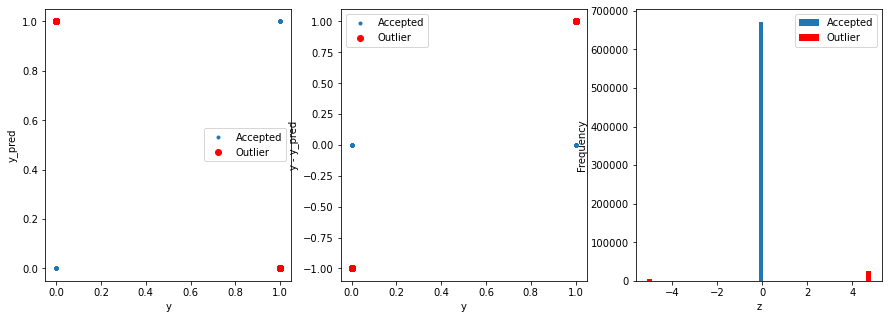

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
#用数据预测y y值与均值之差 超过多少个方差的 视为异常值
outliers= find_outliers(LogisticRegression(), X_train, y_train, sigma=3)
# 删除异常值
X_train=X_train.drop(outliers)
y_train=y_train.drop(outliers)
X_train.shape, y_train.shape

In [15]:
X_train.info()
#由于数据不存在缺失值，所以不需要进行缺失值处理

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671094 entries, 269180 to 338509
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              671094 non-null  float64
 1   distance_from_last_transaction  671094 non-null  float64
 2   ratio_to_median_purchase_price  671094 non-null  float64
 3   repeat_retailer                 671094 non-null  float64
 4   used_chip                       671094 non-null  float64
 5   used_pin_number                 671094 non-null  float64
 6   online_order                    671094 non-null  float64
dtypes: float64(7)
memory usage: 41.0 MB


# 归一化

In [16]:
from sklearn import preprocessing

features_columns = list(X_train.columns)
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train[features_columns])

X_train_scaler = pd.DataFrame(min_max_scaler.transform(X_train[features_columns]))
X_test_scaler = pd.DataFrame(min_max_scaler.transform(X_test[features_columns]))

In [17]:
X_train_scaler.describe()

,0,1,2,3,4,5,6
count,671094.000000,671094.000000,671094.000000,671094.000000,671094.000000,671094.000000,671094.000000
mean,0.002260,0.002099,0.006422,0.880854,0.350985,0.104337,0.643469
std,0.005133,0.008192,0.009482,0.323960,0.477279,0.305698,0.478975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000360,0.000136,0.001738,1.000000,0.000000,0.000000,0.000000
50%,0.000919,0.000458,0.003630,1.000000,0.000000,0.000000,1.000000
75%,0.002323,0.001526,0.007449,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X_test_scaler.describe()

,0,1,2,3,4,5,6
count,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.002506,2.361868e-03,0.006794,0.882093,0.351233,0.100773,0.64981
std,0.006136,1.114757e-02,0.010454,0.322498,0.477357,0.301029,0.47703
min,0.000002,1.337842e-07,0.000005,0.000000,0.000000,0.000000,0.00000
25%,0.000366,1.386745e-04,0.001765,1.000000,0.000000,0.000000,0.00000
50%,0.000940,4.653500e-04,0.003711,1.000000,0.000000,0.000000,1.00000
75%,0.002424,1.560097e-03,0.007824,1.000000,1.000000,0.000000,1.00000
max,0.825483,1.260946e+00,0.630457,1.000000,1.000000,1.000000,1.00000


# 标准化

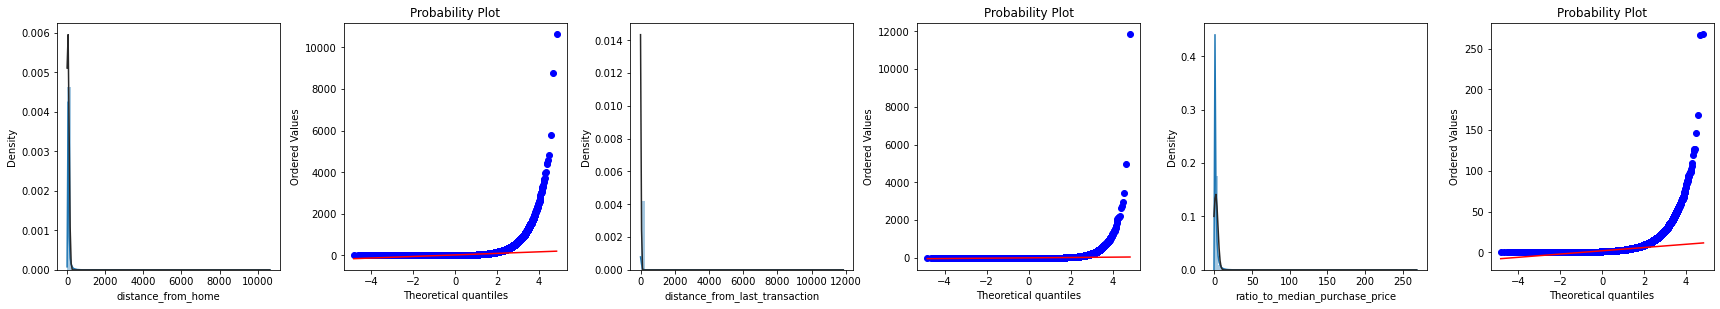

In [77]:
train_cols = 6
train_rows = len(data_show.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in data_show.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(data_show[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(data_show[col], plot=plt)
plt.tight_layout()
filename = "./标准化前的直方图和qq图.png"
plt.savefig(filename)
plt.show()
#对于后四个数据01分布的数据不进行标准化操作


In [20]:
#使用sklearn实现 Yeo-Johnson
from sklearn.preprocessing import PowerTransformer 
pt =PowerTransformer()    #这里method 默认是Yeo-johnson
pt.fit(X_train_scaler)

X_train_s_bc=pt.transform(X_train_scaler)

X_test_s_bc = pt.transform(X_test_scaler)

X_train_s_bc = pd.DataFrame(X_train_s_bc)
X_test_s_bc = pd.DataFrame(X_test_s_bc)


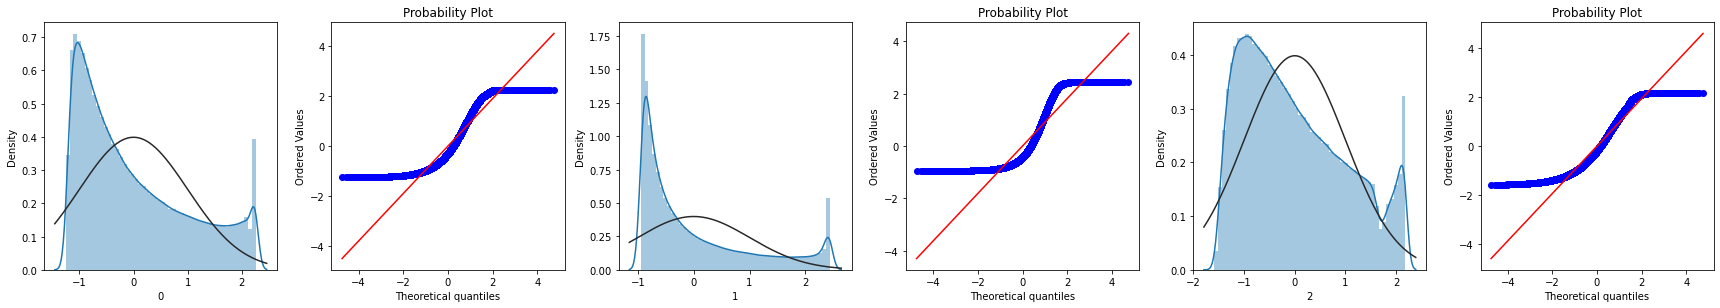

In [68]:
#画图
train_cols=6
train_rows =len(X_train_s_bc.columns[:3])
plt.figure(figsize=(4*train_cols,4*train_rows))
i=0
for col in X_train_s_bc.columns[:3]:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(X_train_s_bc[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(train_rows,train_cols,i) 
    res = stats.probplot(X_train_s_bc[col], plot=plt) 
plt.tight_layout()
plt.show
filename = "./标准化后的直方图和qq图.png"
plt.savefig(filename)

# 导入训练好的模型 进行模型评估

In [22]:
import joblib
rf =joblib.load('rf.pkl') # 随机森林
SVC=joblib.load("SVC.pkl") #SVC
KNN =joblib.load("KNN.pkl") #KNN
DecisionTreeClassifier = joblib.load("DecisionTreeClassifier.pkl") #DecisionTreeClassifier
GradientBoostingClassifier = joblib.load("GradientBoostingClassifier.pkl") # GradientBoostingClassifier 
AdaBoostClassifier = joblib.load("./AdaBoostClassifier.pkl") #AdaBoostClassifier
GaussianNB = joblib.load("GaussianNB.pkl")#GaussianNB 
QuadraticDiscriminantAnalysis = joblib.load("QuadraticDiscriminantAnalysis.pkl")  #QuadraticDiscriminantAnalysis
MultinomialNB = joblib.load("MultinomialNB.pkl")  #MultinomialNB

In [27]:
lr = joblib.load("lr.pkl")#LogisticRegression

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
from matplotlib import pyplot
from numpy import argmax
from functools import reduce
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def find_optimal_cutoff(tpr,fpr,threshold):
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    return optimal_threshold
def best_confusion_matrix(y_test, y_test_predprob):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
    cutoff = find_optimal_cutoff(tpr,fpr,thresholds)
    y_pred = list(map(lambda x:1 if x>=cutoff else 0,y_test_predprob))
    TN,FP,FN,TP = confusion_matrix(y_test,y_pred).ravel()
    return cutoff,TN,FN,FP,TP


In [35]:
from sklearn.metrics import confusion_matrix

In [24]:
def evaluation(clf,X_train,y_train,X_test,y_test,modelname,digits):
    """
        计算各个模型评价指标
        
        Args:
            clf：已经fit好的模型
            X_train,y_train,X_test,y_test:	训练和测试数据集
            modelname：模型名称，为了表格的绘制
            digits：各个评价指标需要保留的位数
        Returns:
            返回单个模型评价指标表格
        """
    
    y_train_predprob = clf.predict_proba(X_train)[:, 1]
    train_auc = round(roc_auc_score(y_train, y_train_predprob),digits)

    y_test_predprob = clf.predict_proba(X_test)[:, 1]
    test_auc = round(roc_auc_score(y_test, y_test_predprob),digits)
    
    train_cutoff, TN1,FN1,FP1,TP1 = best_confusion_matrix(y_train,y_train_predprob)
    test_cutoff, TN2,FN2,FP2,TP2 = best_confusion_matrix(y_test,y_test_predprob)

    #Sen Spe
    recall,specificity= round(TP2/(TP2+FN2),digits), round(TN2/(FP2+TN2),digits)
 
    #PPV NPV
    npv,ppv = round(TN2/(FN2+TN2),digits),round(TP2/(TP2+FP2),digits)
    
    #PLR NLR
    plr,nlr = round((TP2/(TP2+FN2))/(FP2/(FP2+TN2)),digits),round((FN2/(TP2+FN2))/(TN2/(FP2+TN2)),digits)
    
    #F1值
    y_test_pred=list(map(lambda x:1 if x>=test_cutoff else 0,y_test_predprob))
    f1 = round(f1_score(y_test, y_test_pred),digits)
    
    #Youden Index
    youden = round(TP2/(TP2+FN2)+TN2/(FP2+TN2)-1,digits)

    #MCC
    mcc = round(sklearn.metrics.matthews_corrcoef(y_test, y_test_pred),digits)
    
    #Kappa
    kappa =round(sklearn.metrics.cohen_kappa_score(y_test_pred, y_test),digits)

    #Precison
    precison= round(precision_score(y_test,y_test_pred),digits)
  
    eval_df = {'Model': ['Train_AUC','Test_AUC','Specificity','Recall',"Precision",'F1','Youden Index','MCC','Kappa','NPV','PPV','PLR','NLR'], "Name": [train_auc, test_auc,specificity,recall,precison,f1,youden,mcc,kappa,npv,ppv,plr,nlr]}
    eval_df = pd.DataFrame(data=eval_df)

    return eval_df


In [25]:
import sklearn

In [44]:
res_lr=evaluation(lr,X_train,y_train,X_test,y_test,"lr",2)
res_rf=evaluation(rf,X_train,y_train,X_test,y_test,"rf",2)

res_KNN=evaluation(KNN,X_train,y_train,X_test,y_test,"KNN",2)
res_DecisionTreeClassifier=evaluation(DecisionTreeClassifier,X_train,y_train,X_test,y_test,"DecisionTreeClassifier",2)



In [42]:
res_GradientBoostingClassifier=evaluation(GradientBoostingClassifier,X_train,y_train,X_test,y_test,"GradientBoostingClassifier",2)

In [43]:
res_AdaBoostClassifier=evaluation(AdaBoostClassifier,X_train,y_train,X_test,y_test,"AdaBoostClassifier",2)
res_GaussianNB=evaluation(GaussianNB,X_train,y_train,X_test,y_test,"GaussianNB",2)
res_QuadraticDiscriminantAnalysis=evaluation(QuadraticDiscriminantAnalysis,X_train,y_train,X_test,y_test,"QuadraticDiscriminantAnalysis",2)
res_MultinomialNB=evaluation(MultinomialNB,X_train,y_train,X_test,y_test,"MultinomialNB",2)


In [45]:
frames = [res_lr,res_rf,res_KNN,res_DecisionTreeClassifier,res_GradientBoostingClassifier,res_AdaBoostClassifier,res_GaussianNB,res_QuadraticDiscriminantAnalysis,res_MultinomialNB]
res_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Model'), frames)


In [48]:
res_df.columns = ["指标","LogisticRegression","RandomForestClassifier","KNN","DecisionTreeClassifier","GradientBoostingClassifier","AdaBoostClassifier","GaussianNB","QuadraticDiscriminantAnalysis","MultinomialNB"]

In [49]:
res_df

,指标,LogisticRegression,RandomForestClassifier,KNN,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,GaussianNB,QuadraticDiscriminantAnalysis,MultinomialNB
0,Train_AUC,1.00,1.0,1.00,1.0,1.0,1.00,0.99,1.00,0.96
1,Test_AUC,0.97,1.0,1.00,1.0,1.0,1.00,0.96,0.97,0.91
2,Specificity,0.92,1.0,0.98,1.0,1.0,1.00,0.94,0.95,0.83
3,Recall,0.92,1.0,0.99,1.0,1.0,1.00,0.95,0.95,0.86
4,Precision,0.52,1.0,0.84,1.0,1.0,1.00,0.62,0.65,0.32
5,F1,0.67,1.0,0.91,1.0,1.0,1.00,0.75,0.78,0.47
6,Youden Index,0.84,1.0,0.97,1.0,1.0,1.00,0.90,0.90,0.69
7,MCC,0.66,1.0,0.90,1.0,1.0,1.00,0.74,0.77,0.46
8,Kappa,0.62,1.0,0.90,1.0,1.0,1.00,0.72,0.75,0.39
9,NPV,0.99,1.0,1.00,1.0,1.0,1.00,1.00,1.00,0.98


In [50]:
#将表格保存为csv格式文件
res_df.to_csv('model_evaluation.csv',encoding = 'utf_8_sig')

## ROC曲线

In [58]:
 def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpin=100):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
        plt.figure(figsize=(20, 20), dpi=dpin)

        for (name, method, colorname) in zip(names, sampling_methods, colors):
            
            y_test_preds = method.predict(X_test)
            y_test_predprob = method.predict_proba(X_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
            plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
            plt.axis('square')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('False Positive Rate',fontsize=20)
            plt.ylabel('True Positive Rate',fontsize=20)
            plt.title('ROC Curve',fontsize=25)
            plt.legend(loc='lower right',fontsize=20)

        if save:
            plt.savefig('multi_models_roc.png')
            
        return plt


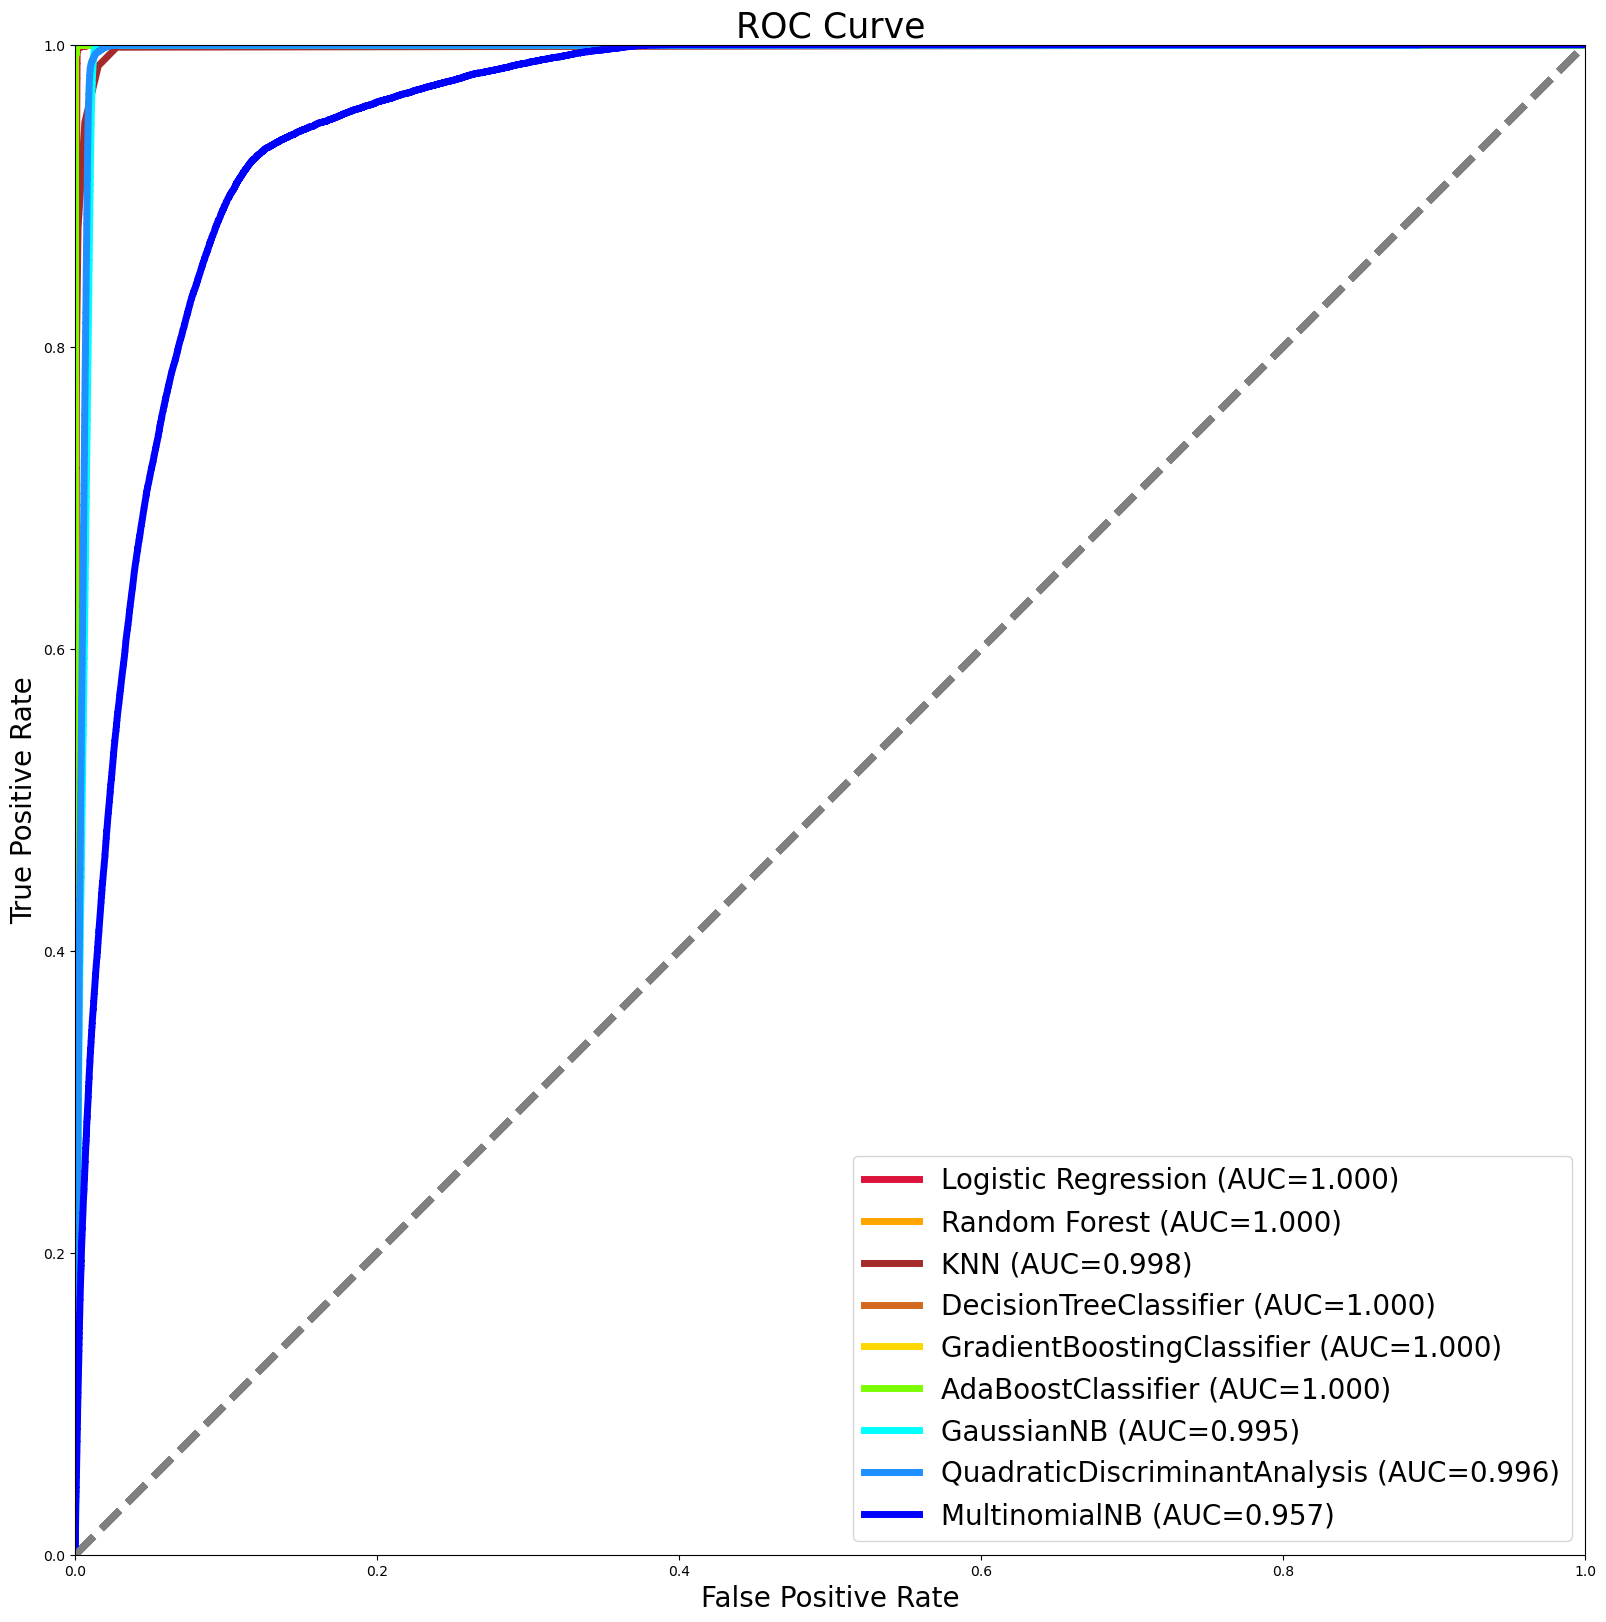

In [59]:
names = ['Logistic Regression', 'Random Forest',"KNN","DecisionTreeClassifier","GradientBoostingClassifier","AdaBoostClassifier","GaussianNB","QuadraticDiscriminantAnalysis","MultinomialNB"]

sampling_methods = [lr,rf,KNN,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,GaussianNB,QuadraticDiscriminantAnalysis,MultinomialNB]

colors = ['crimson','orange',"brown","chocolate","gold","lawngreen","cyan","dodgerblue","b","darkviolet"
         ]

#ROC curves
train_roc_graph = multi_models_roc(names, sampling_methods, colors, X_train, y_train, save = True)
train_roc_graph.savefig('ROC_Train_all.png')


# 混淆矩阵可视化

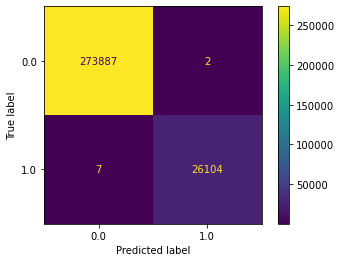

In [73]:
#混淆矩阵可视化
from sklearn.metrics import plot_confusion_matrix
pth= plot_confusion_matrix(GradientBoostingClassifier,X_test, y_test)

filename = 'confusion_matrix1.png'
plt.savefig(filename)
plt.show()